In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
def get_inds_chunks(arr,n_chunks=10,):
    # arr = np.arange(0,31)
    # n_chunks = 5
    # 7 [0 1 2 3 4 5 6]
    # 6 [ 7  8  9 10 11 12]
    # 6 [13 14 15 16 17 18]
    # 6 [19 20 21 22 23 24]
    # 6 [25 26 27 28 29 30]
    # [[0, 7], [7, 13], [13, 19], [19, 25], [25, 31]]
    
    arr_ind = np.arange(arr.size)
    chunks  = np.array_split(arr_ind,n_chunks)
    inds    = []
    for chi in chunks:
        inds.append( [ int(chi[0]), int(chi[-1]+1) ] )
    return inds

def mandelbrot_mat(C,Niter=100,mode0=True):
    ny,nx = C.shape
    Z = np.zeros((Niter,ny,nx))*1j
    
    for n in range(0,Niter-1):
        Z[n+1] = Z[n]**2 + C
        
    Zm = np.abs(Z)
    Ma = np.argmax(Zm>2, axis=0) # If Zm<2 argmax return 0
    
    if mode0: return Ma 
    else    : return np.where(Ma==0,Niter,Ma)


def mandelbrot_chunks(x,y,C,n_chunks=8,Niter=100,mode0=True):
    
    Ma = np.zeros(C.shape)
    for y_inds in get_inds_chunks(y,n_chunks=n_chunks):
        ys,ye = y_inds
        for x_ind in get_inds_chunks(x,n_chunks=n_chunks):
            xs,xe = x_ind
            Ma[ys:ye,xs:xe] = mandelbrot_mat( C[ys:ye,xs:xe], Niter=Niter,mode0=mode0)
                 
    return Ma

def mandelbrot_loop(C,Niter=100):
        
    Ma    = Niter * np.ones(C.shape)
    ny,nx = C.shape
    for i in range(ny):
        for j in range(nx):
            ci,z = C[i,j],0j
            for k in range(1,Niter+1):
                z = z**2 + ci
                if np.abs(z)>=2: 
                   Ma[i,j] = k
                   break
    return Ma
    

In [3]:
N      = 1000
Niter  = 100
x_lims = np.array([-1.9,0.6])
y_lims = np.array([-1.25,1.25])
aspect = np.diff(x_lims)/np.diff(y_lims)
nx     = N
ny     = int(np.round(N*aspect**-1)[0])
x      = np.linspace(x_lims[0],x_lims[1],nx)
y      = np.linspace(y_lims[0],y_lims[1],ny)
X,Y    = np.meshgrid(x,y)
C      = X + Y*1j
mode0  = False

In [4]:
Ma1 = mandelbrot_mat(C,Niter=Niter,mode0=mode0)

C:\Users\Genio\AppData\Local\Temp\ipykernel_29496\2270568186.py:23: RuntimeWarning: overflow encountered in square
  Z[n+1] = Z[n]**2 + C
C:\Users\Genio\AppData\Local\Temp\ipykernel_29496\2270568186.py:23: RuntimeWarning: invalid value encountered in square
  Z[n+1] = Z[n]**2 + C


In [5]:
Ma2 = mandelbrot_chunks(x,y,C,Niter=Niter,mode0=mode0)

C:\Users\Genio\AppData\Local\Temp\ipykernel_29496\2270568186.py:23: RuntimeWarning: overflow encountered in square
  Z[n+1] = Z[n]**2 + C
C:\Users\Genio\AppData\Local\Temp\ipykernel_29496\2270568186.py:23: RuntimeWarning: invalid value encountered in square
  Z[n+1] = Z[n]**2 + C


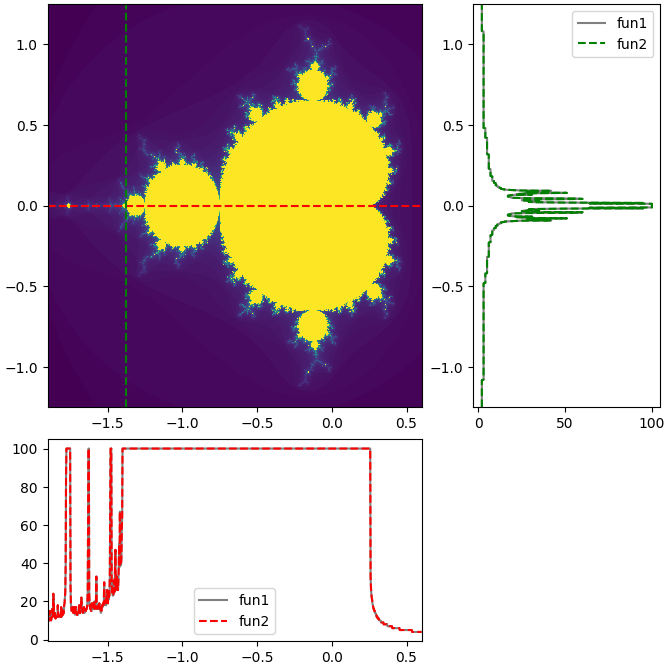

In [6]:
aspect_ratio = 1
cm2in        = 1/2.54
figw         = 17*cm2in
figh         = figw*aspect_ratio**-1 
layout       = [[0,0,1],
                [0,0,1],
                [2,2,3]]
fig,ax = plt.subplot_mosaic(layout,constrained_layout=True,figsize=(figw,figh))

ax[3].remove()
ax[0].sharex(ax[2])
ax[0].sharey(ax[1])

ky  = np.argmin( np.abs(y-0) )
kx  = np.argmin( np.abs(x+1.375) )
y_k = y[ky]*np.ones_like(x)
x_k = x[kx]*np.ones_like(y)

ax[0].pcolormesh(x,y,Ma2)
ax[0].plot(x,y_k,'r--')
ax[0].plot(x_k,y,'g--')

ax[1].plot(Ma1[:,kx],y,'gray',label='fun1',ls='-')
ax[1].plot(Ma2[:,kx],y,'g'   ,label='fun2',ls='--')
ax[1].legend()

ax[2].plot(x,Ma1[ky,:],'gray',label='fun1',ls='-')
ax[2].plot(x,Ma2[ky,:],'r'   ,label='fun2',ls='--')
ax[2].legend()

plt.show()